In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_rows', 1000)

import nltk
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize 
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Himanshu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [51]:
file = pd.ExcelFile('Consolidated Sheet of Package 1_5_.xlsx')
df = pd.read_excel(file,'Bridge')

In [5]:
# df.head()

### Drop columns with greater than 65 percent missing values

In [6]:
cols_to_delete = df.columns[df.isnull().sum() / len(df) > .65]
df.drop(cols_to_delete, axis = 1, inplace = True)

### Number of Bridges in each state

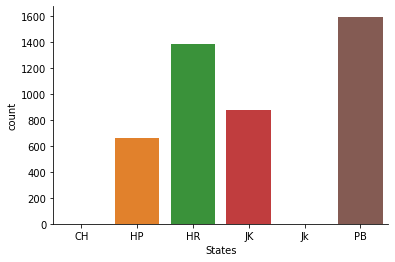

In [7]:
sns.countplot(df['State (1)'])
plt.xlabel('States')
sns.despine()
plt.show()
#Number of bridges in each state

### Bridges count with different types of roads.
##### n is national highway, r is rural roads, e is earthern roads.

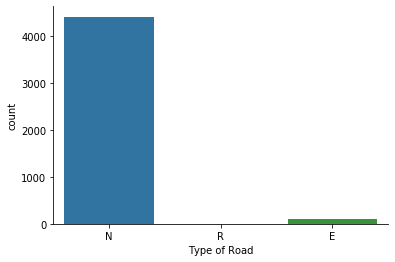

In [8]:
sns.countplot(df['Road Type'])
plt.xlabel('Type of Road')
sns.despine()
plt.show()

#### The term 'chainage' is used in surveying to refer to a distance measured in meters along an imaginary line, such as the centre line of a road or railway.


### Top 20 Sections / Zones with maximum bridges along with their mean chainage length.

In [9]:
a = pd.DataFrame(df.groupby('Section / ZONE').agg(['count','mean']))
a.sort_values([('Location (Chainage)  ', 'count')], ascending = False,inplace = True)
a = a.reset_index()
a.columns.set_levels(['total bridges','average chainage',''],level = 1,inplace=True)
a[['Section / ZONE','Location (Chainage)  ']][:20]

Section / ZONE Location (Chainage)                   
                             total bridges average chainage
0             Ambala                   146    160023.041096
1          Jalandhar                   143    261919.188811
2        jammu city                    135    341848.985185
3            Rajpura                   126    231774.373016
4             Karnal                   119    131449.974790
5            Patiala                   119     62340.226891
6            Sangrur                   107     83082.056075
7           Ludhiana                   105    265647.485714
8             Palwal                    89     99849.258427
9             Rohtak                    79     83523.493671
10            Khanna                    77    272490.987013
11            samba                     75    473939.400000
12          Amritsar                    74    387630.716216
13          Bathinda                    73    153135.410959
14             Ropar                    64     66838.890625
15             Mandi                    64    216421.421875
16    Udhampur-Jammu                    63    384182.412698
17  Shahbad Markanda                    60    167766.533333
18       Kurukshetra                    59    157740.542373
19             Hisar                    58    179052.982759

### Top 20 Sections / Zones with maximum average chainage along with the total bridge count.

In [10]:
df['Section / ZONE'] = [r.lower() for r in df['Section / ZONE']]
a = pd.DataFrame(df.groupby('Section / ZONE').agg(['mean','count']))
a.sort_values([('Location (Chainage)  ', 'mean')], ascending = False,inplace = True)
a = a.reset_index()
a.columns.set_levels(['average chainage','total bridges',''],level = 1,inplace=True)
pd.set_option('display.max_rows', len(a))
a[['Section / ZONE','Location (Chainage)  ']][0:20]

Section / ZONE Location (Chainage)                
                          average chainage total bridges
0            kathua          508359.047619            42
1             kathua         493600.000000             1
2             samba          473939.400000            75
3            fazilka         397556.750000             8
4           amritsar         387630.716216            74
5        reckong peo         384811.142857             7
6     udhampur-jammu         384182.412698            63
7   batote- udhampur         360440.000000             1
8    batote-udhampur         352691.375000            24
9          gurdaspur         348889.444444            27
10        bhabanagar         342285.714286            14
11       jammu city          341848.985185           135
12            malout         305310.722222            18
13     ramban-batote         286749.555556             9
14             kullu         280184.555556            27
15            batala         277738.518519            27
16               leh         276832.918919            37
17     rampur bushar         276472.045455            22
18            khanna         272319.051282            78
19          ludhiana         265647.485714           105

In [11]:
def spellChecker(x):
    l = x.split()
    for i in range(len(l)):
        if l[i] == 'canel':
            l[i] = 'canal'
        if l[i] == 'nala':
            l[i] = 'nalla'
        if l[i] == 'ridge':
            l[i] = 'bridge'
        if l[i] == 'croosing':
            l[i] = 'crossing'
        if l[i] == 'cables':
            l[i] = 'cable'
        if l[i] == 'lahul':
            l[i] = 'lahaul'
        
    return ' '.join(l)

In [12]:
df['Features Intersected (3)'].fillna(df['Features Intersected (3)'].mode()[0], inplace=True)
df['Features Intersected (3)'] = [r.lower() for r in df['Features Intersected (3)']]
df['feature_tokens'] = df['Features Intersected (3)'].apply(word_tokenize)
df['feature_tokens'] = df['feature_tokens'].apply(lambda x: ' '.join([str(w) for w in x if len(w) > 1]))
df.feature_tokens =  df.feature_tokens.apply(spellChecker)

### Top 20 features intersected by the bridges . 

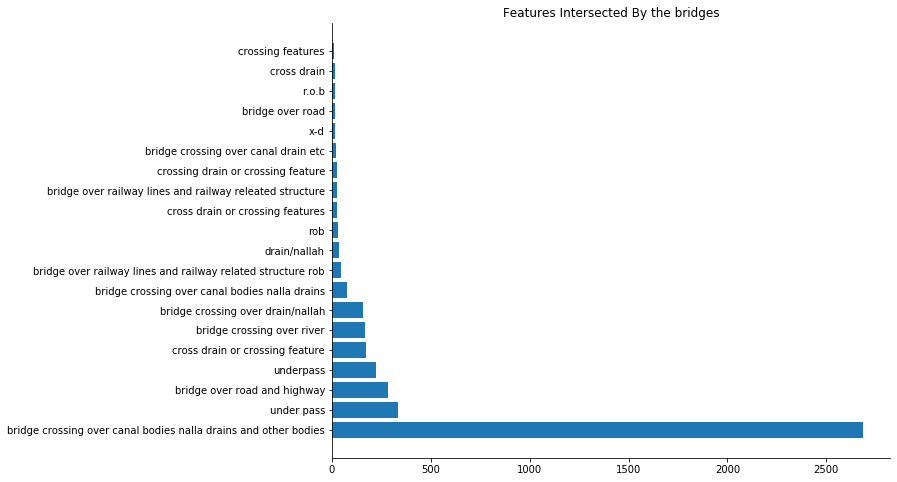

In [16]:
plt.figure(figsize=(10,8))
plt.barh(b['Features Intersected By the Bridge'][0:20],b['Count'][0:20])
sns.despine()
plt.title('Features Intersected By the bridges')
plt.show()

In [15]:
b = df.groupby('feature_tokens').size().sort_values(ascending = False)
b = pd.DataFrame(b)
b = b.reset_index()
b.columns = ['Features Intersected By the Bridge','Count']
b[0:20]

,Features Intersected By the Bridge,Count
0,bridge crossing over canal bodies nalla drains...,2688
1,under pass,332
2,bridge over road and highway,283
3,underpass,224
4,cross drain or crossing feature,172
5,bridge crossing over river,167
6,bridge crossing over drain/nallah,158
7,bridge crossing over canal bodies nalla drains,74
8,bridge over railway lines and railway related ...,48
9,drain/nallah,34


In [78]:
df['Facility Carried by Structure'].fillna(df['Facility Carried by Structure'].mode()[0], inplace=True)
df['Facility Carried by Structure'] = df['Facility Carried by Structure'].apply(lambda x: str(x))
df['Facility Carried by Structure'] = [r.lower() for r in df['Facility Carried by Structure']]
df['facility_tokens'] = df['Facility Carried by Structure'].apply(word_tokenize)
df['facility_tokens'] = df['facility_tokens'].apply(lambda x: ' '.join([str(w) for w in x if len(w) > 1]))
df.facility_tokens =  df.facility_tokens.apply(spellChecker)

### Top 20 facilities carried by the bridges.

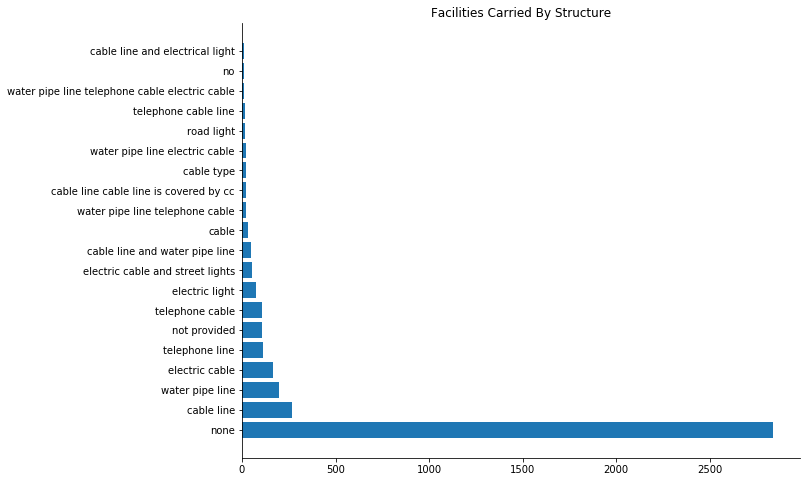

In [91]:
plt.figure(figsize=(10,8))
plt.barh(b['Facilities Carried By Structure'][0:20],b['Count'][0:20])
sns.despine()
plt.title('Facilities Carried By Structure')
plt.show()

In [90]:
b = df.groupby('facility_tokens').size().sort_values(ascending = False)
b = pd.DataFrame(b)
b = b.reset_index()
b.columns = ['Facilities Carried By Structure','Count']
b[0:20]

,Facilities Carried By Structure,Count
0,none,2840
1,cable line,270
2,water pipe line,198
3,electric cable,167
4,telephone line,114
5,not provided,109
6,telephone cable,107
7,electric light,75
8,electric cable and street lights,56
9,cable line and water pipe line,50


### Number of bridges grouped w.r.t States, RTO Zone and Administrative Districts.

In [93]:
col = 'Administrative District'
df1 = df.copy()
df1 = df1[df1[col].notna()]
df1[col] = df1[col].apply(lambda x: str(x))
df1[col] = [r.lower() for r in df1[col]]
df1[col] =  df1[col].apply(spellChecker)
b = df1.groupby(['State (1)','RTO Zone',col]).size().sort_values(ascending = False)
b = pd.DataFrame(b)
b.columns = ['Number of Bridges']
pd.set_option('display.max_rows', len(b))
b[0:20]

Number of Bridges
State (1) RTO Zone Administrative District                   
HR        HR-01    ambala                                 137
JK        JK-02    jammu                                  134
PB        PB-11    patiala                                129
HR        HR-05    ambala                                  99
PB        PB-13    sangrur                                 87
JK        JK-21    jammu                                   75
          JK-14    udhampur                                74
HR        HR-12    rohtak                                  67
          HR-07    ambala                                  59
          HR-78    ambala                                  59
PB        PB-21    jalandhar                               57
HP        HP-33    mandi                                   49
HR        HR-02    panchkula                               48
PB        PB-10    chandigarh                              48
HR        HR-03    panchkula                               47
JK        JK-07    kargil                                  47
          JK-08    kathua                                  42
          JK-05    baramullah                              39
HR        HR-81    jaipur                                  39
HP        HP-12    solan                                   38

In [96]:
b = df1.groupby(col).size().sort_values(ascending = False)
b = pd.DataFrame(b)
b.columns = ['Number of Bridges']
b[0:20]

,Number of Bridges
Administrative District,
ambala,465
jammu,225
rohtak,217
jalandhar,146
patiala,141
chandigarh,132
panchkula,118
rampur,90
mandi,87


In [98]:
col = 'Custodian'
df1 = df.copy()
df1['Type of Bridge (3)'].fillna(df['Type of Bridge (3)'].mode()[0], inplace=True)
df1[col] = df1[col].apply(lambda x: str(x))
df1[col] = [r.lower() for r in df1[col]]
b = df1.groupby([col,'State (1)','Type of Bridge (3)']).size().sort_values(ascending =False)
b = pd.DataFrame(b)
b.columns = ['Count']
pd.set_option('display.max_rows', len(b))
b[0:20]

Count
Custodian           State (1) Type of Bridge (3)       
pwd                 PB        Minor                 440
nhai                HR        Minor                 411
                    PB        Minor                 318
                    JK        Minor                 246
nhai-piu rohtak     HR        Minor                 193
nhai-piu jalandhar  PB        Minor                 184
nhai                HP        Minor                 147
nhai-piu hisar      HR        Minor                 145
nhai-piu mohali     PB        Minor                 131
pwd                 JK        Culvert               117
nhai-piu chandigarh HR        Minor                 105
pwd-jogindernagar   HP        Minor                 104
pwd-hamirpur        HP        Minor                  92
hsiidc manesar (hr) HR        Minor                  89
nhai                PB        Major                  83
bro-vijayak         JK        Minor                  79
bro-57 rcc          JK        Minor                  66
nhai                JK        Major                  65
pwd-bathinda        PB        Minor                  64
pwd                 PB        Major                  63

In [113]:
col = 'High Level or Submersible'
df1 = df.copy()
df1 = df1[df1[col].notna()]
df1[col] = df1[col].apply(lambda x: str(x))
df1[col] = [r.lower() for r in df1[col]]
b = df1.groupby(['Custodian','State (1)',col]).size().sort_values(ascending = False)
b = pd.DataFrame(b)
b.columns = ['Number of Bridges']
pd.set_option('display.max_rows', len(b))
b[0:20]

Number of Bridges
Custodian           State (1) High Level or Submersible                   
PWD                 PB        high level                               516
NHAI                HR        high level                               478
                    PB        high level                               427
                    JK        high level                               347
NHAI-PIU Jalandhar  PB        high level                               232
NHAI-PIU Rohtak     HR        high level                               214
NHAI-PIU Mohali     PB        high level                               189
NHAI                HP        high level                               179
NHAI-PIU Hisar      HR        high level                               150
NHAI-PIU Chandigarh HR        high level                               140
PWD-Hamirpur        HP        high level                               131
PWD-JoginderNagar   HP        high level                               111
HSIIDC Manesar (HR) HR        high level                                89
BRO-Vijayak         JK        high level                                82
BRO-57 RCC          JK        high level                                74
PWD-Bathinda        PB        high level                                69
BRO                 HP        high level                                67
NHIDCL              JK        high level                                64
PWD-Nahan           HP        high level                                50
PWD                 HR        high level                                49

In [116]:
col = 'No. of Lanes (3)'
df1 = df.copy()
df1 = df1[df1[col].notna()]
b = pd.DataFrame(df1.groupby(['State (1)','Type of Bridge (3)',col]).size(),columns = ['Count'])
pd.set_option('display.max_rows', len(b))
b[0:20]

Count
State (1) Type of Bridge (3) No. of Lanes (3)                    
CH        Minor              3                                  2
HP        CV                 2                                  1
          Culvert            2                                  7
          Extra Long         2                                 19
                             No proper lane marking             3
          Major              1                                  4
                             2                                 67
                             4                                  1
                             No proper lane marking             7
          Minor              1                                 41
                             2                                435
                             4                                 11
                             No proper lane marking            69
HR        Culvert            2                                  9
                             4                                  1
                             6                                  1
                             10                                 1
                             10 ( 2 lanes work in progess)      1
          Extra Long         2                                 38
                             3                                 11

In [58]:
def LengthExtractor(str):
    s = ''
    for ch in str:
        if(ch == ' ' or ch == 'm' or ch == 'n' or ch == '&'):
            break
        s += ch
    if(s == ''):
        return float(0)
    return float(s)

In [59]:
col = 'Overall Length of Bridge (3)'
df1 = df.copy()
df1 = df1[df1[col].notna()]
df1[col] = df1[col].astype(str)
df1[col] = [r.lower() for r in (df1[col])]
df1[col] = df1[col].apply(LengthExtractor)

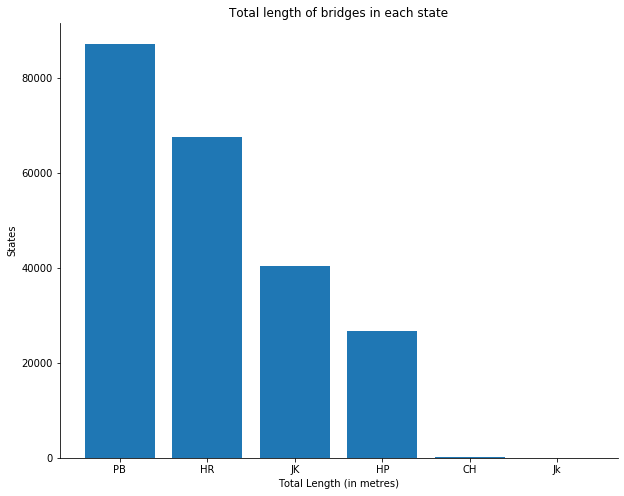

,State (1),Overall Length of Bridge (3)
5,PB,87137.250
2,HR,67390.340
3,JK,40340.440
1,HP,26767.697
0,CH,64.000
4,Jk,0.000


In [73]:
b = pd.DataFrame(df1.groupby(['State (1)',])[col].sum())
b = b.reset_index()
b = b.sort_values(by = col,ascending = False)
plt.figure(figsize=(10,8))
plt.bar(b['State (1)'],b['Overall Length of Bridge (3)'])
sns.despine()
plt.ylabel('States')
plt.xlabel('Total Length (in metres)')
plt.title('Total length of bridges in each state')
plt.show()
b[0:25]

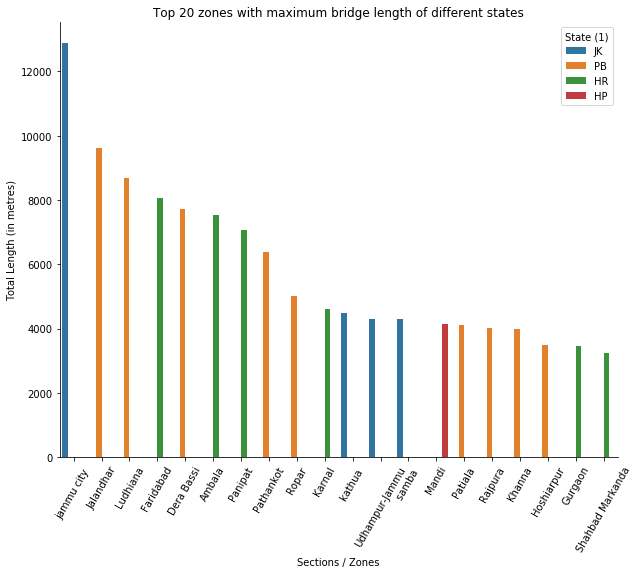

,State (1),Section / ZONE,Overall Length of Bridge (3)
126,JK,jammu city,12881.80
149,PB,Jalandhar,9599.15
154,PB,Ludhiana,8675.50
60,HR,Faridabad,8056.05
140,PB,Dera Bassi,7704.60
50,HR,Ambala,7542.05
88,HR,Panipat,7074.08
167,PB,Pathankot,6371.80
172,PB,Ropar,5008.30
75,HR,Karnal,4622.35


In [84]:
b = pd.DataFrame(df1.groupby(['State (1)','Section / ZONE'])[col].sum())
b = b.reset_index()
b = b.sort_values(by = col,ascending = False)
plt.figure(figsize=(10,8))
sns.barplot(data = b[0:20],x = 'Section / ZONE',y = 'Overall Length of Bridge (3)',hue = 'State (1)')
sns.despine()
plt.xlabel('Sections / Zones')
plt.ylabel('Total Length (in metres)')
plt.title('Top 20 zones with maximum bridge length of different states')
plt.xticks(rotation = 60)
plt.show()
b[0:25]

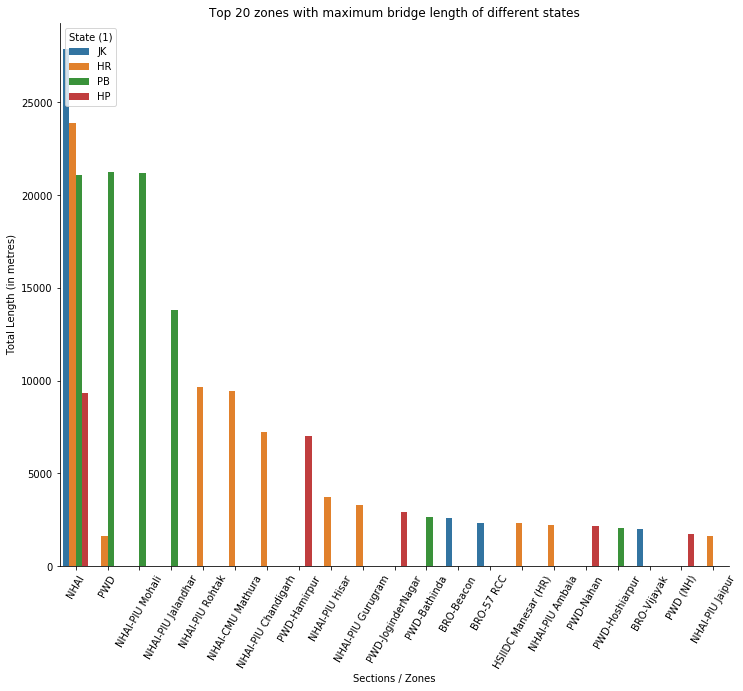

,State (1),Custodian,Overall Length of Bridge (3)
35,JK,NHAI,27896.940
14,HR,NHAI,23855.830
46,PB,PWD,21239.460
45,PB,NHAI-PIU Mohali,21167.550
43,PB,NHAI,21059.440
44,PB,NHAI-PIU Jalandhar,13824.400
23,HR,NHAI-PIU Rohtak,9677.550
15,HR,NHAI-CMU Mathura,9443.850
2,HP,NHAI,9307.850
17,HR,NHAI-PIU Chandigarh,7248.660


In [92]:
b = pd.DataFrame(df1.groupby(['State (1)','Custodian'])[col].sum())
b = b.reset_index()
b = b.sort_values(by = col,ascending = False)
plt.figure(figsize=(12,10))
sns.barplot(data = b[0:25],x = 'Custodian',y = 'Overall Length of Bridge (3)',hue = 'State (1)')
sns.despine()
plt.xlabel('Sections / Zones')
plt.ylabel('Total Length (in metres)')
plt.title('Top 20 zones with maximum bridge length of different states')
plt.xticks(rotation = 60)
plt.show()
b[0:25]

In [25]:
df.columns

Index(['State (1)', 'N.H.NO.', 'Bridge ID', 'Road Type', 'RTO Zone',
       'Section / ZONE', 'Location (Chainage)  ', 'Bridge No.', 'Latitude (2)',
       'Longitude (2)', 'Features Intersected (3)',
       'Facility Carried by Structure', 'Administrative District',
       'Nearest City/Town', 'Custodian', 'Age of Bridge (3)',
       'High Level or Submersible', 'Overall Length of Bridge (3)',
       'Type of Bridge (3)', 'No. of Lanes (3)', 'Load Rating (3)',
       'Average Daily Traffic(ADT)', 'Whether the Bridge is in Grade',
       'Road Width', 'Overall Deck Width (3)',
       'Approach Roadway Width Including Shoulder',
       'Height of Approach Embankment', 'Average Skew', 'Whether Navigable',
       'Vertical clearance', 'Horizontal Clearance', 'Total Number of Spans',
       'Span Arrangement', 'Superstructure Type (Structure Form)',
       'Superstructure Type (Corrected)', 'Material of construction',
       'Pier Type', 'Abutment Type', 'Type of Bearings', 'Wearing Coat T

In [26]:
df.nunique() / len(df) * 100

State (1)                                   0.132392
N.H.NO.                                     1.345984
Bridge ID                                 100.000000
Road Type                                   0.066196
RTO Zone                                    3.640777
                                             ...    
Rating for Environmental Impact (1N)        0.176523
Trailor Unit HT1-HT9                        1.500441
Trailor Unit with Turn Table HT10-HT13      1.544572
feature_tokens                              2.052074
facility_tokens                             3.729038
Length: 61, dtype: float64